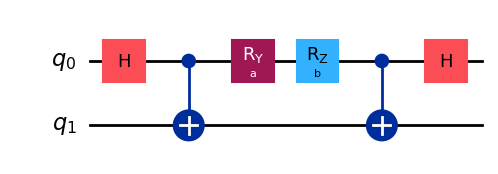

In [ ]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import Pauli, SparsePauliOp

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Define a circuit with two parameters.
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(Parameter("a"), 0)
circuit.rz(Parameter("b"), 0)
circuit.cx(0, 1)
circuit.h(0)

# Explicitly display the Matplotlib figure for the circuit
display(circuit.draw(output="mpl"))


# Define a sweep over parameter values, where the second axis is over
# the two parameters in the circuit.]
params = np.vstack([
    np.linspace(-np.pi, np.pi, 100), # First parameter sweep: -π to π in 100 steps
    np.linspace(-4 * np.pi, 4 * np.pi, 100) # Second parameter sweep: -4π to 4π in 100 steps
]).T
# Shape: (100, 2) # 100 parameter sets, each with 2 parameters
# This creates:
# [[param1[0], param2[0]],
#  [param1[1], param2[1]],
#  [param1[2], param2[2]],
#  ...
#  [param1[99], param2[99]]]
# First few rows:
# [[-3.14159265, -12.56637061],  # Parameter set 0
#  [-3.07840151, -12.31327447],  # Parameter set 1  
#  [-3.01521038, -12.06017832],  # Parameter set 2
#  ...
#  [ 3.01521038,  12.06017832],  # Parameter set 97
#  [ 3.07840151,  12.31327447],  # Parameter set 98
#  [ 3.14159265,  12.56637061]]  # Parameter set 99


# Define three observables. Many formats are supported here including
# classes such as qiskit.quantum_info.SparsePauliOp. The inner length-1
# lists cause this array of observables to have shape (3, 1), rather
# than shape (3,) if they were omitted.
observables = [
    [SparsePauliOp(["XX", "IY"], [0.5, 0.5])],
    [Pauli("XX")],
    [Pauli("IY")]
]

# Instantiate a new statevector simulation based estimator object.
estimator = StatevectorEstimator()

# Estimate the expectation value for all 300 combinations of
# observables and parameter values, where the pub result will have
# shape (3, 100). This shape is due to our array of parameter
# bindings having shape (100,), combined with our array of observables
# having shape (3, 1)
pub = (circuit, observables, params)
job = estimator.run([pub])

# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]

# Error-bar information is also available, but the error is 0
# for this StatevectorEstimator.
result.data.stds

# Pull out the array-based expectation value estimate data from the
# result and plot a trace for each observable.
for idx, pauli in enumerate(observables):
    plt.plot(result.data.evs[idx], label=pauli)
plt.legend()
plt.show()